In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score

In [2]:
data = pd.read_csv('mushrooms.csv')

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
labels = data['class']

In [5]:
labels

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [6]:
features = data.copy()
features = data.drop(['class'], axis=1)
features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [7]:
# Remove unnecessary features
removed_features = \
    ['gill-attachment', 'stalk-shape', 'stalk-root', 'veil-type', 'veil-color', 'ring-number']

In [8]:
features = features.drop(removed_features, axis=1)
features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,c,n,k,s,s,w,w,p,k,s,u
1,x,s,y,t,a,c,b,k,s,s,w,w,p,n,n,g
2,b,s,w,t,l,c,b,n,s,s,w,w,p,n,n,m
3,x,y,w,t,p,c,n,n,s,s,w,w,p,k,s,u
4,x,s,g,f,n,w,b,k,s,s,w,w,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,c,b,y,s,s,o,o,p,b,c,l
8120,x,s,n,f,n,c,b,y,s,s,o,o,p,b,v,l
8121,f,s,n,f,n,c,b,n,s,s,o,o,p,b,c,l
8122,k,y,n,f,y,c,n,b,s,k,w,w,e,w,v,l


In [9]:
# Since data is nominal, we should use dummy variables to pass into a Naive Bayes classifier
_features = features.copy()
_features = pd.get_dummies(_features)
_labels = labels.copy()
_features

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [10]:
# Make the label column binary by mapping 'p' to 0 and 'e' to 1
a = {'p':0, 'e':1}
binary_labels = _labels.map(a)
binary_labels

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: class, Length: 8124, dtype: int64

In [11]:
# Split data into training and validation sets, where the validation set contains 30% of the total dataset, or 2438 observations
# Note that we will be using K-fold cross validation so there is no need to split data into three separate groups.

In [12]:
x_train, x_val, y_train, y_val = train_test_split(
    _features, binary_labels, test_size=0.3, random_state=42) 

In [13]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)

Training shape:  (5686, 100)
Validation shape:  (2438, 100)


In [14]:
# Determine which value of K is the best for KNN by looking at error rate for various values of K

In [15]:
# Split training data into two groups: train and test 
xtrain, xtest, ytrain, ytest = train_test_split(
    x_train, y_train, test_size = 0.5, random_state=42)

In [16]:
print("Training shape: ", xtrain.shape)
print("Testing shape: ", xtest.shape)

Training shape:  (2843, 100)
Testing shape:  (2843, 100)


In [17]:
error_rate = []
for i in range(0, 60):
    n = i + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))
    

Minimum error:- 0.0 at K = 1


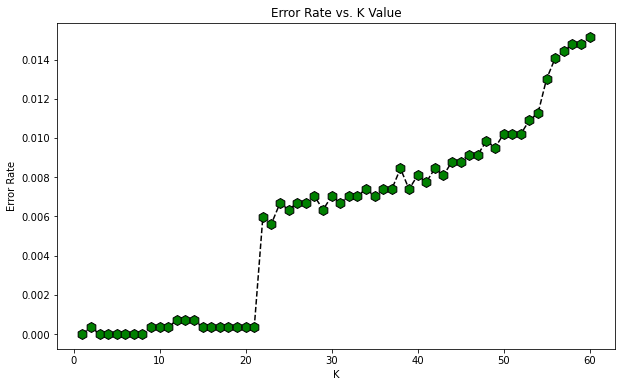

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,61),error_rate,color='black', linestyle='dashed', 
         marker='h',markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [19]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)

Training shape:  (5686, 100)
Validation shape:  (2438, 100)


In [20]:
# There is no error for several K values when K is small (less than 20), so pick K=5.

In [21]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [61]:
N = 5 # Number of neighbors for KNN
five_nn = neighbors.KNeighborsClassifier(n_neighbors=N)
five_nn

KNeighborsClassifier()

In [62]:
five_nn_f1scores = cross_val_score(
    five_nn, x_train, y_train, cv=cv, scoring='f1')

In [63]:
five_nn_f1scores

array([1., 1., 1., 1., 1.])

In [64]:
five_nn_f1scores.mean()

1.0

In [65]:
# Try imposing a different topological structure onto the data i.e. label encoding

In [66]:
le = LabelEncoder()

In [67]:
encoded_features = pd.DataFrame()
copy_features = features.copy()
for column in copy_features.columns: 
    encoded_features[column] = le.fit_transform(copy_features[column])
encoded_features

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,2,2,7,7,4,2,3,5
1,5,2,9,1,0,0,0,4,2,2,7,7,4,3,2,1
2,0,2,8,1,3,0,0,5,2,2,7,7,4,3,2,3
3,5,3,8,1,6,0,1,5,2,2,7,7,4,2,3,5
4,5,2,3,0,5,1,0,4,2,2,7,7,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,11,2,2,5,5,4,0,1,2
8120,5,2,4,0,5,0,0,11,2,2,5,5,4,0,4,2
8121,2,2,4,0,5,0,0,5,2,2,5,5,4,0,1,2
8122,3,3,4,0,8,0,1,0,2,1,7,7,0,7,4,2


In [68]:
encoded_labels = le.fit_transform(labels)
encoded_labels

array([1, 0, 0, ..., 0, 1, 0])

In [69]:
xenc_train, xenc_val, yenc_train, yenc_val = train_test_split(
    encoded_features, encoded_labels, test_size=0.3, random_state=42) 

In [70]:
print("Train shape: ", xenc_train.shape)
print("Val shape: ", xenc_val.shape)

Train shape:  (5686, 16)
Val shape:  (2438, 16)


In [71]:
error_rate = []
for i in range(0, 60):
    n = i + 1
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

Minimum error:- 0.0 at K = 1


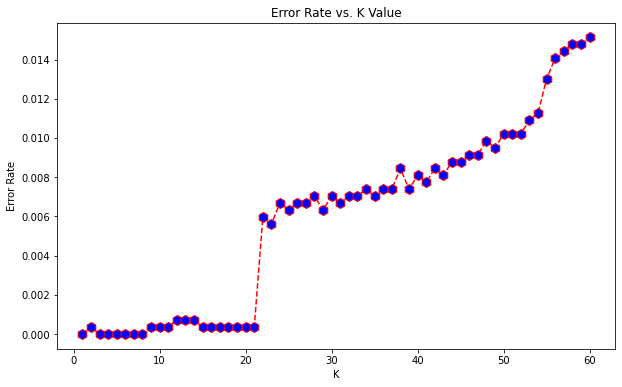

In [72]:
plt.figure(figsize=(10,6))
plt.plot(range(1,61),error_rate,color='red', linestyle='dashed', 
         marker='h',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [73]:
N = 5 # Number of neighbors for KNN
enc_five_nn = neighbors.KNeighborsClassifier(n_neighbors=N)
enc_five_nn

KNeighborsClassifier()

In [74]:
enc_five_nn_f1scores = cross_val_score(
    enc_five_nn, xenc_train, yenc_train, cv=cv, scoring='f1')

In [75]:
enc_five_nn_f1scores

array([0.99428571, 0.99721448, 0.99431818, 0.9937667 , 0.99218071])

In [76]:
enc_five_nn_f1scores.mean()

0.9943531579113213

In [78]:
# The five-nearest neighbor model using dummy variables for the 16 features has the best classification f1 score. 
# Now, compute the f1 score for the model when run on the validation set.
five_nn.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
predicted = five_nn.predict(x_val)

In [82]:
predicted.shape

(2438,)

In [81]:
y_val

1971    1
6654    0
5606    0
3332    1
6988    0
       ..
462     1
1956    1
3781    0
799     1
2402    1
Name: class, Length: 2438, dtype: int64

In [84]:
validation_f1score = f1_score(
    y_val, predicted)

In [85]:
validation_f1score

1.0